### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m, "\n")

for i in range(len(m)):
    print("The avg of the row number " + str(i+1) + " is: ", m[i].mean())

print("") # to create a new line

for i in range(len(m.transpose())):
    print("The avg of the colomn number " + str(i+1) + " is: ", m.transpose()[i].mean())

print("\nThe overall mean is: ", m.mean())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

The avg of the row number 1 is:  1.5
The avg of the row number 2 is:  5.5
The avg of the row number 3 is:  9.5

The avg of the colomn number 1 is:  4.0
The avg of the colomn number 2 is:  5.0
The avg of the colomn number 3 is:  6.0
The avg of the colomn number 4 is:  7.0

The overall mean is:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# using np.outer
print(np.outer(u, v))

# using list comprehension
outer = np.array([[i*j for i in v] for j in u])
print(outer)

# using broadcasting
u = u.reshape(4, 1)
outer = u*v

print(outer)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [11]:
matrix = np.random.random(60).reshape(10, 6)

for i in range(len(matrix)):
    print("The mask of the \"" + str(i+1) + "\" row is:\t",matrix[i]<0.1)
    if ((matrix[i]<0.1).any()):
        matrix[i] = 0

print(matrix)

The mask of the "1" row is:	 [False False False False False False]
The mask of the "2" row is:	 [False False False False False False]
The mask of the "3" row is:	 [ True False False False False False]
The mask of the "4" row is:	 [False False False False False False]
The mask of the "5" row is:	 [False False False False False False]
The mask of the "6" row is:	 [False False False False False False]
The mask of the "7" row is:	 [ True False False False False False]
The mask of the "8" row is:	 [ True False False False False  True]
The mask of the "9" row is:	 [False False False False False False]
The mask of the "10" row is:	 [False False False False False  True]
[[0.15434985 0.51369831 0.74604432 0.39893844 0.77608359 0.47475432]
 [0.17314946 0.19108667 0.90908135 0.35120134 0.30866073 0.89563052]
 [0.         0.         0.         0.         0.         0.        ]
 [0.40353067 0.30011434 0.78018479 0.42388221 0.38666541 0.53302782]
 [0.34614236 0.99602128 0.16974423 0.44215891 0.45361

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close


Printing the "10-step-selected" array:

 [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]

Printing the reversed array:

[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599

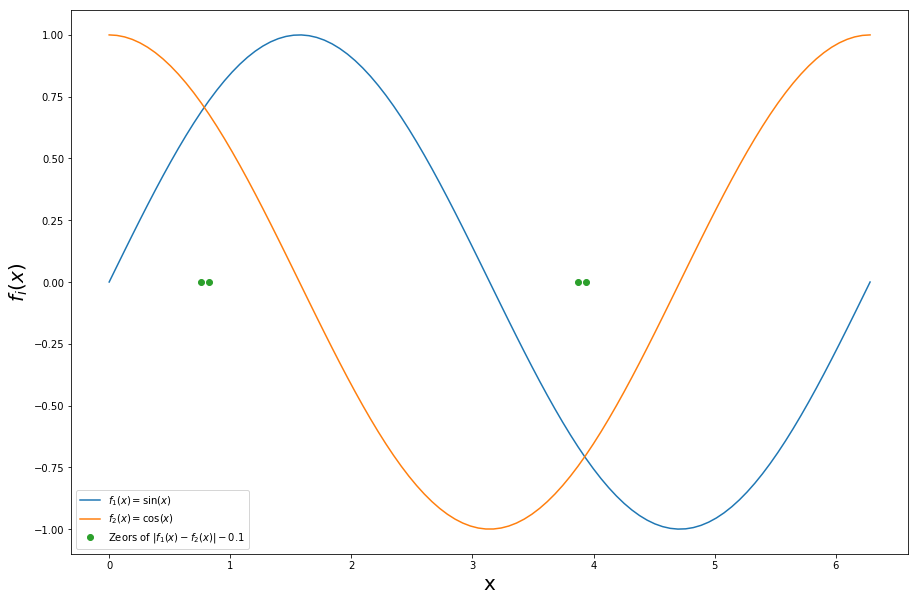

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

a100 = np.linspace(0.,  2*np.pi, 100)

# selectin every 10 elements
b = a100[::10]
print("\nPrinting the \"10-step-selected\" array:\n\n" , b)

# reversing the array
a100r = a100[::-1]
print("\nPrinting the reversed array:\n")
print(a100r)

# looking for the mask for which holds the requested condition
mask = [np.absolute(np.sin(a100) - np.cos(a100))<0.1]
print("\nPrinting the mask:\n")
print(mask)

test = a100[tuple(mask)]    # "tuple"  writing to avoid warings; python waring says multi-indexing with no-tuple
                            #   will be deprecated
print("\nPrinting a simple test on the results\n",test)

ytest = test*0  # making salected point to stay on the x-axis (having y=0)

fig, ax = plt.subplots(figsize=(15, 10))

# using the writing  « r"string" » to allow LaTeX writing into strings
plt.plot(a100, np.sin(a100), label=r"$f_1(x)=\sin(x)$")
plt.plot(a100, np.cos(a100), label=r"$f_2(x)=\cos(x)$")
plt.plot(test, ytest, 'o',label=r"Zeors of $|f_1(x)-f_2(x)|-0.1$")
plt.xlabel("x", fontsize = 20)
plt.ylabel(r"$f_i(x)$", fontsize = 20)
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [22]:
# creating matrix
mult10 = np.array([[i*j for i in range(1,11)] for j in range(1,11)])
print("\nThe matrix found is:\n\n", mult10)

tr = sum(mult10[i][i] for i in range(len(mult10)))  # to avoid warnings here python suggested me to use "sum"
                                                    # built-in method instead of "np.sum", because it in the future
                                                    # will return a different result
print("\nThe trace is: ", tr)

antid = np.array([mult10[i][-i-1] for i in range(0, 10)])
print("\nThe anti-diagonal is: ", antid)

updiag = np.array([mult10[i][i+1] for i in range(0, 9)])
print("\nThe off-set1 diagonal is: ", updiag)


The matrix found is:

 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

The trace is:  385

The anti-diagonal is:  [10 18 24 28 30 30 28 24 18 10]

The off-set1 diagonal is:  [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [26]:
# builfing array of cities
cities_r_66 = np.array(["Chicago", "Springfield", "Saint-Louis", "Tulsa, Oklahoma City", "Amarillo, Santa Fe", "Albuquerque, Flagstaff", "Los Angeles"])
# builfing array of city positions
city_positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

# building distance matrix
cities_distances = np.absolute(city_positions.reshape(10, 1) - city_positions)

print("\nPrinting distance matrix in [miles]:\n")
print(cities_distances)

dist_km = np.round(cities_distances/1.609)

print("\n\nPrinting distance matrix in [km]:\n")
print(dist_km, "\n")

# Adding cities as first row and column


Printing distance matrix in [miles]:

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


Printing distance matrix in [km]:

[[   0.  123.  188.  457.  541.  730.  917.  960. 1189. 1521.]
 [ 123.    0.   65.  334.  418.  607.  794.  837. 1066. 1398.]
 [ 188.   65.    0.  269.  353.  542.  728.  771. 1001. 1333.]
 [ 457.  334.  269.    0.   84.  273.  459.  502.  732. 1064.]
 [ 541.  418.  353.   84.    0.  189.  375.  418.  648.  980.]
 [ 730.  607.  542.  273.  189.    0.  186.  229.  459.  791.]
 [ 917.  794.  

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [27]:
# "limit number" till which looking for prime numbers
till_num = 10000

# defining the function to evaluate prime numbers
def sieve_prime(till_num):
    sieve = np.array(np.zeros(till_num), "bool")
    # Metodo più generale
    # sieve = np.array([True/False for i in range(100)])
    for i in range(till_num):
        # checking if the number is prime
        if (i != 0 and i != 1):
            d = int(i**0.5)    # stopping to look for dividers till the square radix of the number itself
                               # (here the algorithm is only checking if the number is prime)
            while d > 1:
                if i % d == 0:    # checkig if the "test number i" is divided by d
                    d = 0            # if one divisor is found, then the search is stopped (the number is not prime)
                else:
                    d -= 1
            if d == 1:               # d=1 implies the algorithm found no divisor, so the number is prime
                                     # and its index (in the index mask) is set to True
                sieve[i-1] = True
    return sieve

# quick itaration to evaluate some timeit: results are reported below (the time for some evaluations is quite large)
#till_num = 100
#for i in range(4):
#    till_num *= 10
#    %timeit sieve_prime(till_num)


sieve = sieve_prime(till_num)
primes = np.array([i for i in range(1, till_num+1)])
#print(primes)
primes = primes[sieve]
print(primes)

[   2    3    5 ... 9949 9967 9973]


$\textbf{Results of previous runs}$

For till_num = 1000: 1.19 ms ± 72.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

For till_num = 10000: 28.1 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

For till_num = 40000: 254 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 60000: 476 ms ± 5.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 80000: 717 ms ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 100000: 925 ms ± 89.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 400000: 9.01 s ± 39.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 600000: 17.2 s ± 68.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 800000: 27.3 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 1000000: 39.4 s ± 873 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

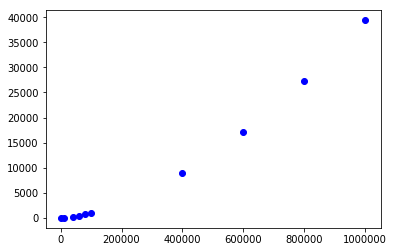

In [28]:
# plotting the results of the previous cell in a plot
plt.plot([1000, 10000, 40000, 60000, 80000, 100000, 400000, 600000, 800000, 1000000], [1.19, 28.1, 254, 476, 717, 925, 9010, 17200, 27300, 39400], "bo")

In [34]:
# Implementing ERATOSTHENES'S sieve
print("This programme will search for all prime numbers from 2 to the square of a given number.")
print("It is suggested to insert a prime number.")
print("This script uses the Eratosthenes algorythm.")
#lower_prime = int(input("Insert the lower prime u know: "))
lower_prime = 99
upper_limit = lower_prime**2

to_search = np.array([i for i in range(2, upper_limit)])

# sieve: a mask with which select the numbers. At start, they are all supposed to be prime, then this condition
#        will be corrected testing the list via Eratosthenes's sieve
sieve = np.array([True for i in range(2, upper_limit)])

# previous scheme
#for n in to_search:
#    if sieve[n-2] == True:
#        # print(n)
#        sieve_indeces = [i-2 for i in range(n*n, upper_limit, n)]
#        sieve[sieve_indeces] = False

# in-line operations scheme
for n in to_search:
    # N.B.: "to_search" contains the numbers starting from 2: their index, n, must be lowered by 2 to select
    #        the expected number
    if sieve[n-2] == True:
        # print(n)
        # starting from n²-2 (the -2 is due to the way "to_start" is built) and proceeding with step=n
        # the algorithm 
        sieve[[i-2 for i in range(n*n, upper_limit, n)]] = False


# TO PRINT IN AN EXTENDED FORM
#for num in to_search[sieve]:
#    print(num)

# selecting primes via the sieve
primes = to_search[sieve]

# printing results
print(primes)

This programme will search for all prime numbers from 2 to the square of a given number.
It is suggested to insert a prime number.
This script uses the Eratosthenes algorythm.
[   2    3    5 ... 9781 9787 9791]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

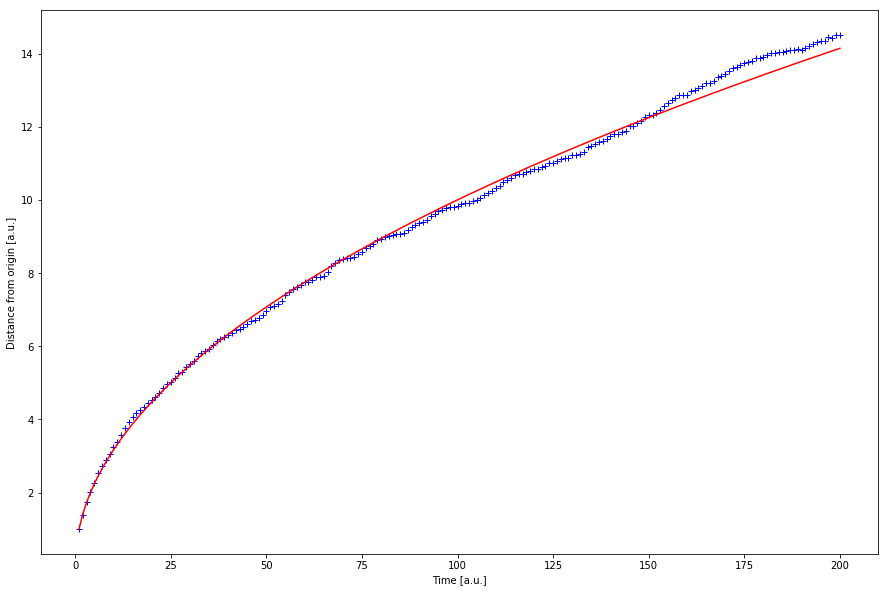

In [40]:
# building the whole matrix
steps = np.random.randint(0, 2, size=(1000, 200))
# changing the 0 values with -1 so they can be easier manipulated
steps[steps == 0] = -1

# modifying the matrix so that it represent the actual distance from the origin insted of every step
for l in range(steps.shape[0]):
    for c in range(steps.shape[1] - 1, - 1, -1):
        steps[l][c] = steps[l,:c+1].sum()

# taking the square elementwise
steps = steps**2

# building the average distance at every time-step
avgs = np.zeros(200)
for c in range(steps.shape[1]):
    avgs[c] = steps[:,c].mean()

# prparing time vector to plot
t_d = np.array([i for i in range(1, 201)])

# evaluating the expected result to be plot to check the expected results
y_d = np.sqrt(t_d)

fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(t_d, np.sqrt(avgs), 'b+', label="Experimental data")
plt.plot(t_d, y_d, "r", label = "Expected results")
plt.xlabel("Time [a.u.]")
plt.ylabel("Average distance from origin [a.u.]")
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [1]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2018-12-12 18:50:42--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2018-12-12 18:50:44--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc1a629d2870d911348152588630.dl.dropboxusercontent.com/cd/0/inline/AXVhuZhH6s7QQ6jeurhlT9shdmS6N9U_ybgq-BGZ-VNbeslDo8jm4CiHqIAqpuUuX35_AYU5-_WRrOQiki2JBadn_SPVu25NGIfedpRfbB3A6eU5icL8qz4qciaoCa0UMvo7B-GKauAzoNRJKOgVdWoO8M1qs6PWQGEBYcMUr7AKzUm4r1Fp44uZdkonw8Q0-nU/file [segue]
--2018-12-12 18:50:45--  https://uc1a629d2870d911348152588630.dl.dropboxusercontent.com/cd/0/inline/AXVhuZhH6s7QQ

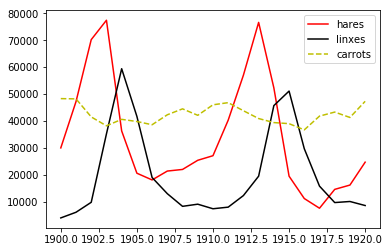

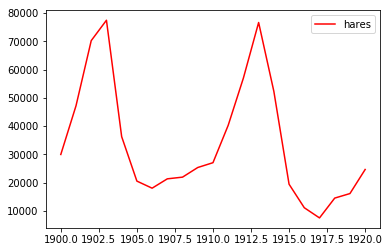

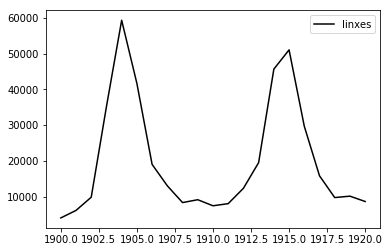

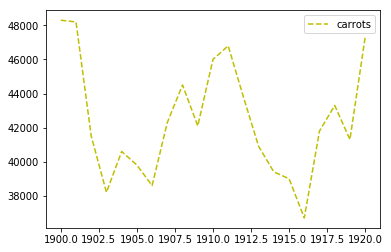


Features of hares population among years:
Mean:  34080.95238095238
Variance:  20897.906458089667

Features of lynxes population among years:
Mean:  20166.666666666668
Variance:  16254.591536908763

Features of carrots population among years:
Mean:  42400.0
Variance:  3322.5062255844787

Correlation between hares and lynxes:
 [[1.         0.07189206]
 [0.07189206 1.        ]]

Correlation between lynxes and carrots:
 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]

Correlation between carrots and hares:
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]] 

The maximum population at the year: 1900 is that of the carrots
The maximum population at the year: 1901 is that of the carrots
The maximum population at the year: 1902 is that of the hares
The maximum population at the year: 1903 is that of the hares
The maximum population at the year: 1904 is that of the lynxes
The maximum population at the year: 1905 is that of the lynxes
The maximum population at the year: 1906 is that

In [45]:
data = np.loadtxt("populations.txt", skiprows = 1)

years   = data[:,0]
hares   = data[:,1]
lynxes  = data[:,2]
carrots = data[:,3]

# Plot together
plt.plot(years, hares, 'r-', label = "hares")
plt.plot(years, lynxes, 'k-', label = "linxes")
plt.plot(years, carrots, 'y--', label = "carrots")
plt.legend()
plt.show()
# Make different plots
plt.plot(years, hares, 'r-', label = "hares")
plt.legend()
plt.show()
plt.plot(years, lynxes, 'k-', label = "linxes")
plt.legend()
plt.show()
plt.plot(years, carrots, 'y--', label = "carrots")
plt.legend()
plt.show()

print("\nFeatures of hares population among years:")
print("Mean: ", hares.mean())
print("Variance: ", hares.std())
print("\nFeatures of lynxes population among years:")
print("Mean: ", lynxes.mean())
print("Variance: ", lynxes.std())
print("\nFeatures of carrots population among years:")
print("Mean: ", carrots.mean())
print("Variance: ", carrots.std())
print("\nCorrelation between hares and lynxes:\n", np.corrcoef(hares, lynxes))
print("\nCorrelation between lynxes and carrots:\n", np.corrcoef(lynxes, carrots))
print("\nCorrelation between carrots and hares:\n", np.corrcoef(carrots, hares), "\n")

populations = np.array(["hares", "lynxes", "carrots"])

for year in range(len(data)):
    print("The maximum population at the year:", int(data[year][0]), "is that of the", populations[data[year,1:4].argmax()])